In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
titanic.Sex.isnull().sum()

0

In [4]:
df=titanic.copy()

In [5]:
mean_encoded_sex = df.groupby(['Sex'])['Survived'].mean().to_dict() 
  
df['Sex_encoded'] =  df['Sex'].map(mean_encoded_sex) 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [6]:
titanic.Embarked.isnull().sum()

2

In [7]:
titanic.Embarked = titanic.Embarked.fillna(titanic.Embarked.mode()[0])
titanic.Embarked.isnull().sum()

0

In [8]:
df_1=titanic.copy()

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(enc.fit_transform(df_1[['Embarked']]))
df_encoded.columns = enc.get_feature_names(['Embarked'])
df_encoded

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [10]:
titanic.Cabin.isnull().sum()

687

In [11]:
titanic[titanic.Cabin.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
titanic['Cabin'].fillna(value='0',inplace=True)

In [13]:
titanic.Cabin.isnull().sum()

0

In [14]:
df_2=titanic.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df_2["Cabin_enc"] = label_enc.fit_transform(df_2.Cabin)
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,82
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,56
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,31
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,61


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

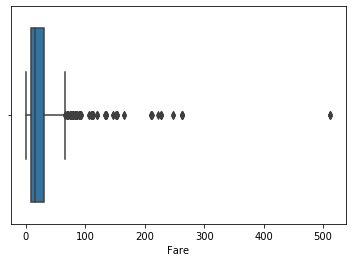

In [16]:
sns.boxplot(x=titanic['Fare']) 

In [17]:
df_3=titanic.copy()

In [18]:
df_3.insert (11, "z_score", 0)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [19]:
from scipy import stats
df_3['z_score']=stats.zscore(df_3.Fare)
outliers_zscore=(df_3.z_score>3)|(df_3.z_score<-3)
outliers_zscore.sum()

20

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [20]:
def func(df_3):
    upper_replace_value = df_3[z_score<=3]['Fare'].max()
    lower_replace_value = df_3[z_score>=-3]['Fare'].min()
    df_4=df_3.copy()
    if (df_3.z_score>3):
        df_3['Fare'] = df_3['Fare'].replace(np.upper_replace_value)   
    elif (df_3.z_score<-3):
        df_3['Fare'] = df_3['Fare'].replace(np.lower_replace_value)
    return df_3

In [21]:
outliers_zscore.sum()

20

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [22]:
df_4=titanic.copy()

In [23]:
    q1 = df_4['Fare'].quantile(0.25)
    q3 = df_4['Fare'].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers_iqr = (df_4['Fare']< lower_limit) | (df_4['Fare'] > upper_limit)
outliers_iqr.sum()

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [24]:
for i in df_4['Fare']:

    if i > upper_limit: 
        df_4['Fare'] = df_4['Fare'].replace(i, df_4.Fare[(df_4.Fare < upper_limit)].max())
    elif i < lower_limit:
        df_4['Fare'] = df_4['Fare'].replace(i, df_4.Fare[(df_4.Fare > lower_limit)].min())

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [26]:
df_5=titanic.copy()

In [27]:
lower_lim = df_5.Fare.quantile(0.01)
upper_lim = df_5.Fare.quantile(0.99)
outliers_hardedges=(df_5['Fare']< lower_lim) | (df_5['Fare'] > upper_lim)
outliers_hardedges.sum()

9

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [28]:
for i in df_5['Fare']:
    lower_lim = df_5.Fare.quantile(0.01)
    upper_lim = df_5.Fare.quantile(0.99)
    if i > upper_lim: 
        df_5['Fare'] = df_5['Fare'].replace(i, df_5.Fare[(df_5.Fare < upper_lim)].max())
    elif i < lower_lim:
        df_5['Fare'] = df_5['Fare'].replace(i, df_5.Fare[(df_5.Fare > lower_lim)].min())

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [ ]:
#Hard-Edges ile yapmak daha mantıklı outlier sayısı 9